<h1><center>Report on Purchase prediction with Supervised learning Algorithm</center></h1>


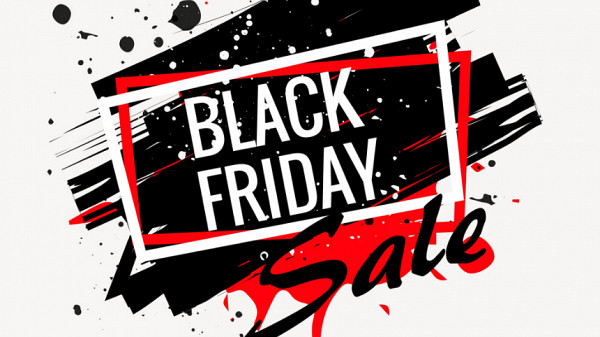

<h2> <center>Course: Big Data and Social Media Analytics</center></h2>

<h1> <center>Submitted by: Emmy</center></h1>

<h2> <center>Business intelligence and Analytics</center></h2>

<h2> <center>Instructor : Professor J.J</center></h2>

<H2>Content </H2>


<ol>
    <B>
<li>INTRODUCTION</li>
<li>DATA EXPLORATION</li>
<li>DESCRIPTIVE ANALYSIS</li>
<li>MODELLING</li>
<li>MODEL SELECTION AND PREDICTION</li>
<li>SUMMARY</li>
        </B>
</ol>

<h2> 1. INTRODUCTION </h2>


Company ABC Private Limited wants to understand customer purchase behavior, specifically purchase amount) against product of different categories. They have shared purchase summary of various customers for the selected high-volume products from the last months.
<H3>Business Problem </H3>
The ABC private Limited wants to understand better their customer purchase behavior against different products categories. There are seven categorical variables to analyse.
Let us list down some points that can be addressed with the analsysis.
<ul>
<li>Understanding the cutomers on the basis of their purchasing habits.</li>
<li>Understanding the purchasing habits according to Age groups, Occuptation, City_Categories.</li>
</ul>
The segmented groups above will then be used to apply models which we will use to predict the purchase spending for a particular customer. Quickly, lets dive in by understanding the data.

Specifically, the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.


<h2>First step is to import the necessary Libraries</h2>

<h4>Some important libraries :</h4>
<h4>visualize :</h4>
<ol>
<li>Matplotlib</li>
<li>Seaborn</li>
<li>Missingno</li>
</ol>

<h4>manipulate :</h4>
<ol>
<li>Pandas</li>
<li>Numpy</li>
</ol>

<h4>Modeling :</h4>
<ol>
<li>Keras</li>
<li>Tensorflow</li>
<li>Sklearn</li>
</ol>


<h4>algorithms :</h4>
<ol>
<li>XGBRegressor</li>
<li>DecisionTreeRegressor</li>
<li>GradientBoostingRegressor</li>
<li>RandomForestRegressor</li>
<li>LinearSVR</li>
</ol>

<h4>other :</h4>
<ol>
<li>warnings</li>
<li>IPython</li>
<li>Time</li>
</ol>



In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('bmh')

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
import tensorflow as tf

import time
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

<h3>Import the Dataset</h3>
<h4>The dataset consist of two data </h4>

In [160]:
#READ THE DATA 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


It will be better to combine the train and test data so we don't need to repeat the same process two time we will make a new column (kind) and we will fill it with train & test to separate the data when we finish

In [161]:
train['kind'] = 'train'
test['kind'] = 'test'
combine = pd.concat([train,test], axis=0)

<h2> 2. DATA EXPLORATION </h2>
Taking a closer look on the test data, train data and combines data. 

In [162]:
train.shape, test.shape, combine.shape

((550068, 13), (233599, 12), (783667, 13))

In [163]:
print(combine.shape)
combine.head()


(783667, 13)


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,kind
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,train


<h4>Dependent Variable</h4>
<ol>
<li>Gender- male or female</li>
<li>Age- age category the customer belongs to</li>
<li>Occupation- Occupation of the customer</li>
<li>City_Category-city category the customer resides in</li>
<li>Stay_In_Current_City_Years- no. of years the customer has resided in the current city</li>
<li>User_ID- unique id of the user</li>
<li>Marital_Status- married or unmarried</li>
<li>Product_Category_1- products of category 1</li>
<li>Product_Category_2- products of category 2</li>
<li>Product_Category_3- products of category 3</li>
</ol>

<h4>Target Variable</h4>
Purchase- the purchase ammount in dollars
<h4>Others</h4>
<ol>
<li>User_ID- unique id of the user</li>
<li>Product_ID- unique id of the product</li>
</ol>

<h4>Explore the dataset to see the </h4>

In [164]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
kind                          783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 83.7+ MB


<h5>change the columns of categorical variables to object type </h5>

In [165]:
combine['Marital_Status'] = combine['Marital_Status'].astype('O')
combine['Occupation'] = combine['Occupation'].astype('O')
combine['Product_Category_1'] = combine['Product_Category_1'].astype('O')
combine['Product_Category_2'] = combine['Product_Category_2'].astype('O')
combine['Product_Category_3'] = combine['Product_Category_3'].astype('O')

In [166]:
combine.describe()

,Purchase,User_ID
count,550068.000000,7.836670e+05
mean,9263.968713,1.003029e+06
std,5023.065394,1.727267e+03
min,12.000000,1.000001e+06
25%,5823.000000,1.001519e+06
50%,8047.000000,1.003075e+06
75%,12054.000000,1.004478e+06
max,23961.000000,1.006040e+06


<h5>We can view the description of the object data type. </h5>

In [167]:
combine.describe(include='O')

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,kind
count,783667,783667,783667,783667,783667,783667,537685.0,237858.0,783667,783667,783667
unique,7,3,2,2,21,20,17.0,15.0,3677,5,2
top,26-35,B,M,0,4,5,8.0,16.0,P00265242,1,train
freq,313015,329739,590031,462538,103086,215950,91317.0,46469.0,2709,276425,550068


<h5>Then we want to find out the number of missing values in the data set </h5>

In [168]:
combine.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
kind                               0
dtype: int64

<h5>Visualizing the dataset with missing value library "Missingno"  </h5>
With the aid of this library. the whole data set caan be viewed in a holistic manner. Viewing all the basic data variables, showing misisng and enpty variable set. 

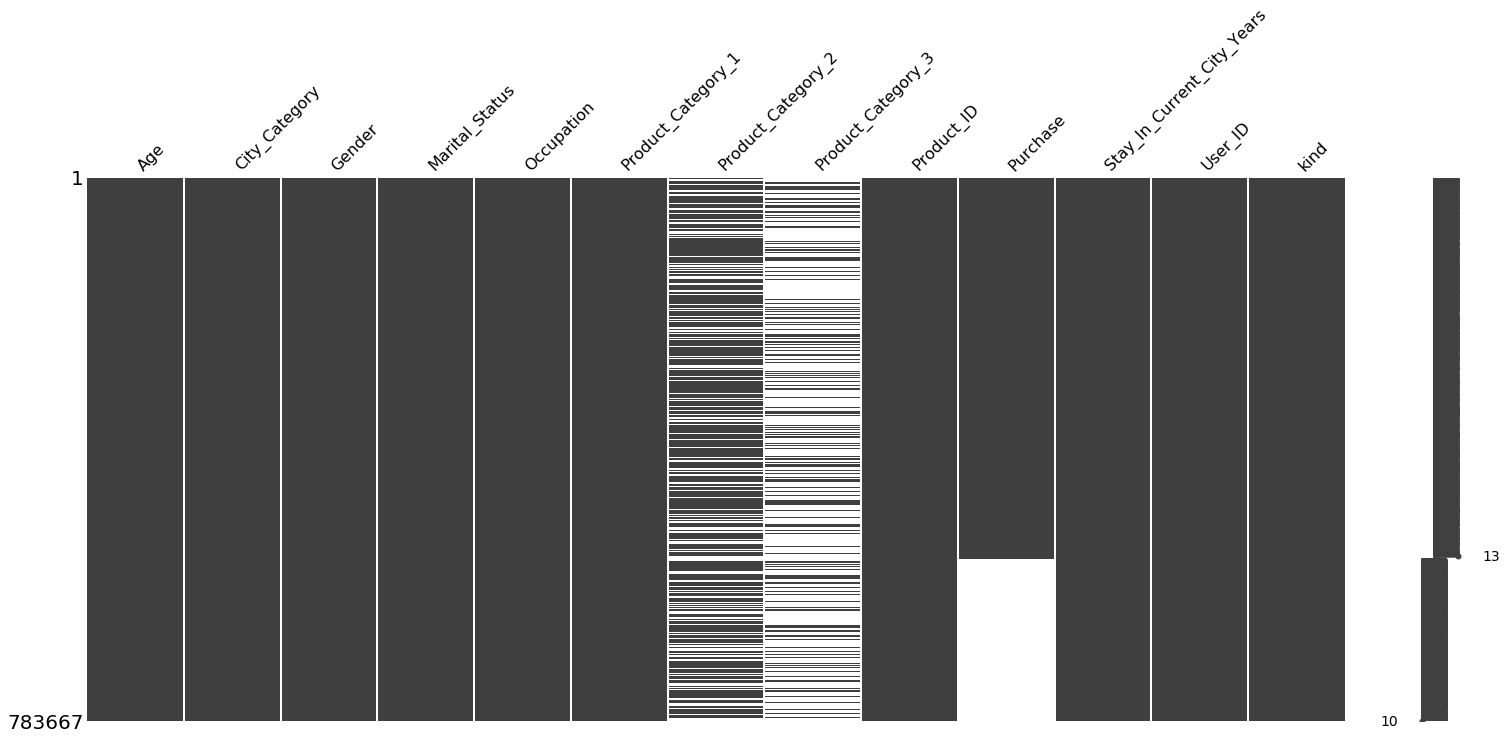

In [169]:
msno.matrix(combine);

<H2>Missing values</H2>

Here i will just add two columns to specify the row that got missing value, so 1 if the row is missing and 0 if not
and i will use them as a features

In [171]:
combine['miss_1'] = [1 if x!=x else 0 for x in combine['Product_Category_3']]
combine['miss_2'] = [1 if x!=x else 0 for x in combine['Product_Category_2']]
combine['Product_Category_3'].fillna(method='bfill', inplace=True)
combine['Product_Category_2'].fillna(method='bfill', inplace=True)
combine.dropna(subset=['Product_Category_3'],inplace=True)

In [172]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783665 entries, 0 to 233596
Data columns (total 15 columns):
Age                           783665 non-null object
City_Category                 783665 non-null object
Gender                        783665 non-null object
Marital_Status                783665 non-null object
Occupation                    783665 non-null object
Product_Category_1            783665 non-null object
Product_Category_2            783665 non-null float64
Product_Category_3            783665 non-null float64
Product_ID                    783665 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783665 non-null object
User_ID                       783665 non-null int64
kind                          783665 non-null object
miss_1                        783665 non-null int64
miss_2                        783665 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 95.7+ MB


In [173]:
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

<h2>3. DESCRIPTIVE ANALYSIS</h2>
let's try to see the relation between the labels and the target

<h3>View count </h3>
The data count in all variables, this will show the total variation among thee data set cleaarly seeing the categorical data set in a graphical (Barchart view)

In [174]:
target = 'Purchase'
cat_col = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
           'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

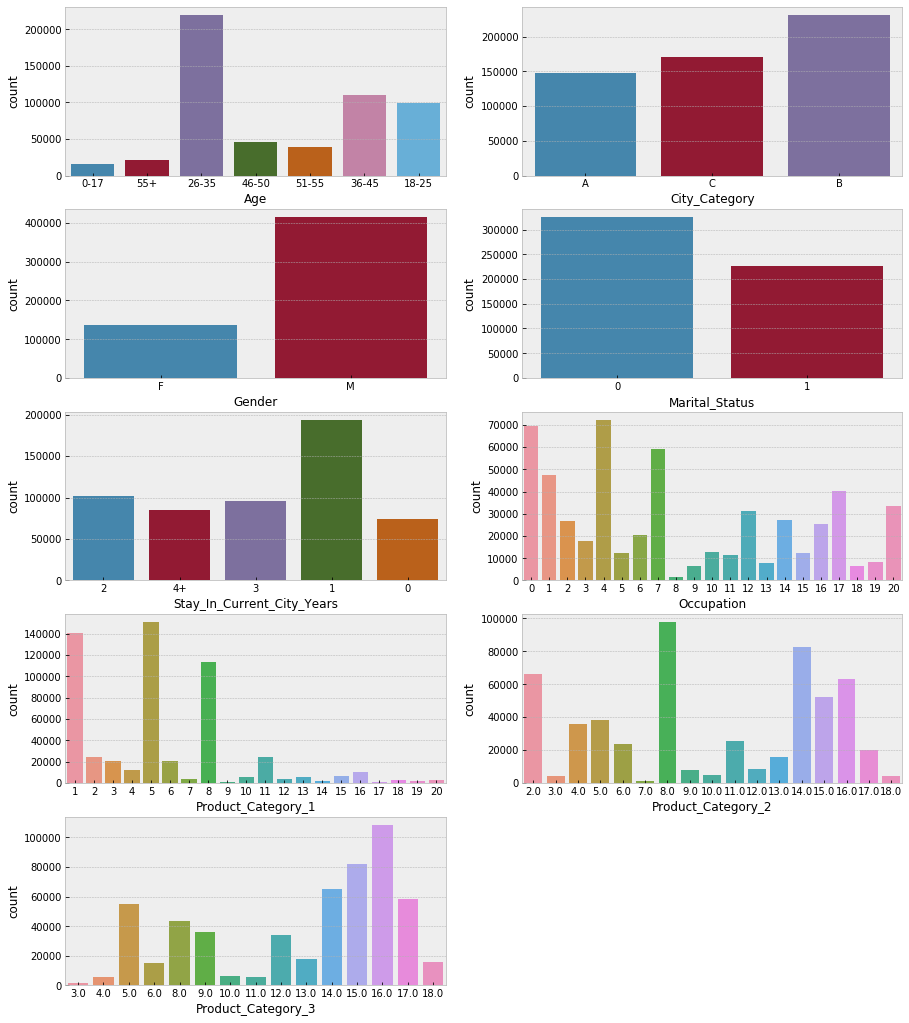

In [175]:
fig, ax = plt.subplots(5,2, figsize=(15,18))
ax.flat[-1].set_visible(False) # to remove last plot
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, data=train)
    plt.xlabel(col)

<h3>Ploting Unique product by age group and Age group distribution.</h3>
The plot show us the comparation between age group per unique product sold and the age group distribution on the data set. 

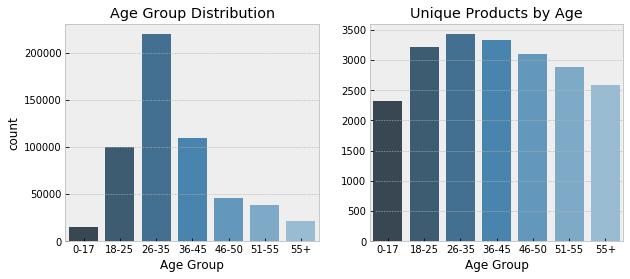

In [176]:
prod_byage = train.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax = ax.ravel()

sns.countplot(train['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

<h3>Ploting categories by purchase made.</h3>
This shows the Gender categories per purchase made in different city category. A clear view of what happens in different city distribution. the male in city category C. shows a little lead, follow by the Males in city category B. This means that our result will have some significant be impact.


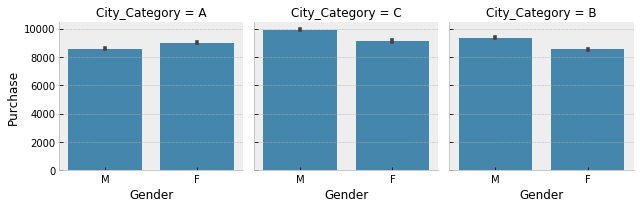

In [177]:
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

<h3>Marital status against the stay in city.</h3>


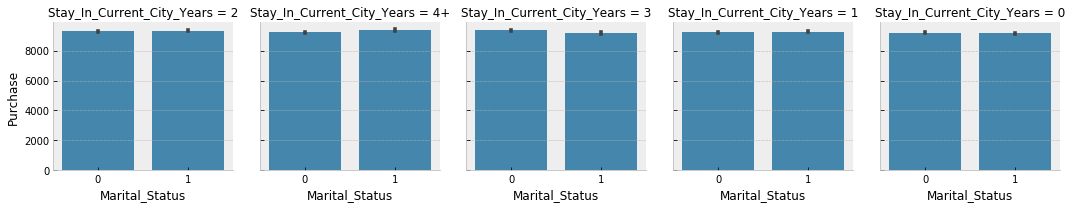

In [178]:
g = sns.FacetGrid(train,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

<h3>Purchase against stay in city category.</h3>
This clearly hows the distribution of purchases, according to marital status by their cities. 

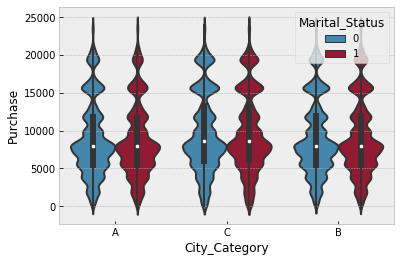

In [179]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status', data=train)

<h3>Box Plot of Purchases according to their ages.</h3>
The box plot show the purchases by age group. There are outliers ofcourse it can be seen clearly. 

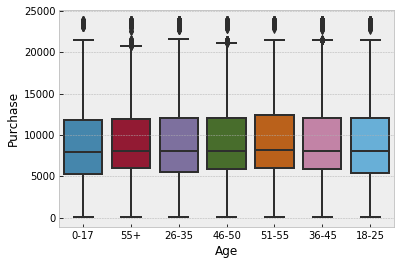

In [180]:
sns.boxplot('Age','Purchase', data = train)
plt.show()

<h3>Correlation heat map between the variables  </h3>
This is used to view the correlation between the continous variables. Most of which are non corrolated to each other, the product categories show the most sign of corellation.

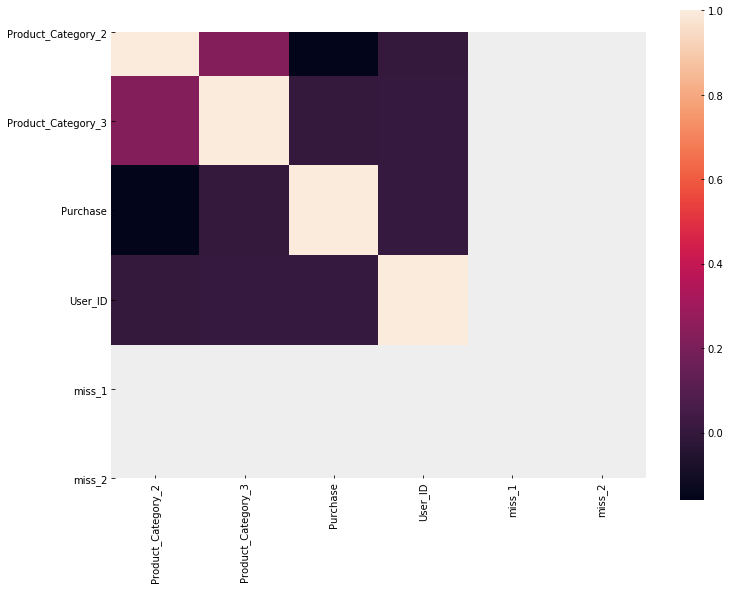

In [181]:
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=1.0, square=True)

<h3>Occupation Distribution  </h3>

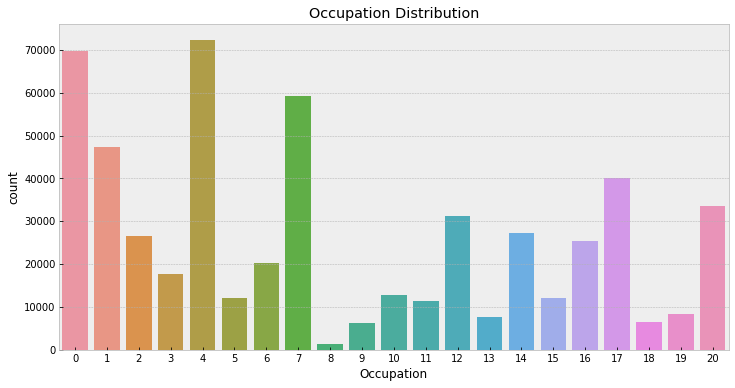

In [183]:
plt.figure(figsize=(12,6))
sns.countplot(train['Occupation'])
plt.title('Occupation Distribution')
plt.show()

<h3>Next dive deep into the product categories to find the categories purchase per sub category</h3>

In [184]:
def find_category(Cat):
    SubCategory = []
    mean_purchase = []

    for i in train[Cat].unique():
        SubCategory.append(i)
    SubCategory.sort()

    for e in SubCategory:
        mean_purchase.append(train[train[Cat]==e]['Purchase'].mean())

    plt.figure(figsize=(10,5))

    sns.barplot(x=SubCategory,y=mean_purchase)
    plt.title('Mean of the Purchases per SubCategory')

    plt.xlabel(Cat, rotation=0)
    plt.ylabel('Mean Purchase')
    plt.show()

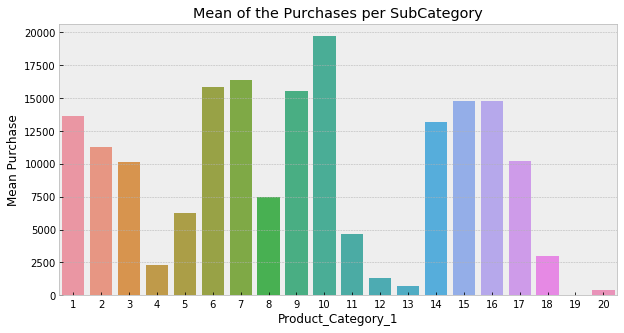

In [232]:
find_category('Product_Category_1') 

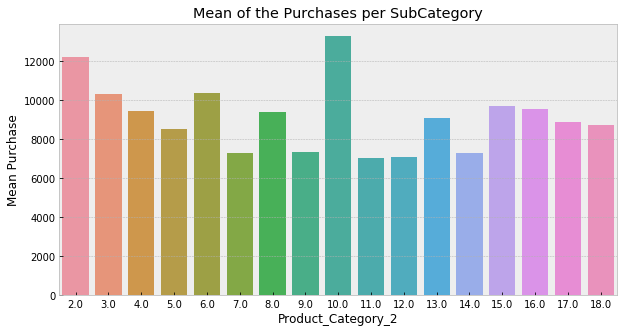

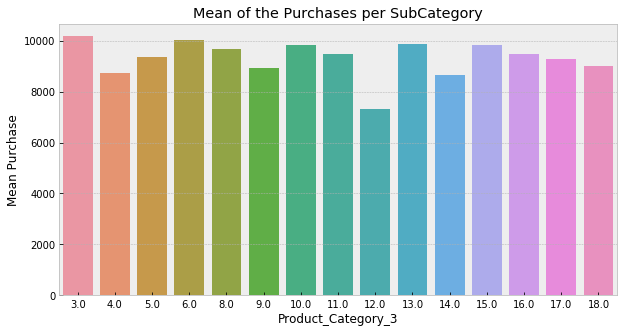

In [233]:
find_category('Product_Category_2')
find_category('Product_Category_3')

<h2>Handle categorical data</h2>

The Age category, Gender, stay category and the city category are classified accordingly

In [186]:
combine.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,kind,miss_1,miss_2
0,0-17,A,F,0,10,3,6.0,14.0,P00069042,8370.0,2,1000001,train,0,0
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train,0,0
2,0-17,A,F,0,10,12,14.0,17.0,P00087842,1422.0,2,1000001,train,0,0
3,0-17,A,F,0,10,12,14.0,17.0,P00085442,1057.0,2,1000001,train,0,0
4,55+,C,M,0,16,8,2.0,17.0,P00285442,7969.0,4+,1000002,train,0,0


In [187]:
age_cat = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
combine['Age'] = combine['Age'].map(age_cat)

city_cat = pd.get_dummies(combine['City_Category'], drop_first=True, prefix='City_Category')
combine = pd.concat([combine, city_cat], axis=1)
combine.drop('City_Category', axis=1, inplace=True)

gender_cat = {'M':0, 'F':1}
combine['Gender'] = combine['Gender'].map(gender_cat)

stay_cat = pd.get_dummies(combine['Stay_In_Current_City_Years'], drop_first=True, prefix='Stay_In_Current_City_Years')
combine = pd.concat([combine, stay_cat], axis=1)
combine.drop('Stay_In_Current_City_Years', axis=1, inplace=True)

<h3>Create some more variable </h3>

<h4>Price</h4>
Although this variable isn't given, it is clear it has impact on the prediction. the price is gotten from the minimum purchase value of a particular Product_ID. Assuming that is the price. 
Dictionary of product IDs with minimum purchase

In [188]:
prod_prices = combine.groupby('Product_ID').min()['Purchase'].to_dict()

In [189]:
# Find price from the minimun of price of all category
def find_price(row):
    prod = row['Product_ID']
    return prod_prices[prod]

combine['Price'] = combine.apply(find_price,axis=1)

<h3>Bachelor/Spintser</h3>
This variable is derived form the single marital status at a particular age group. 

In [190]:
combine['Bachelor']=((combine.Age == 2) & (combine.Marital_Status == 0) & (combine.Gender == 1)).astype(int)

<h3>View the missing data</h3>
View the data one more time to make sure all is in order. 

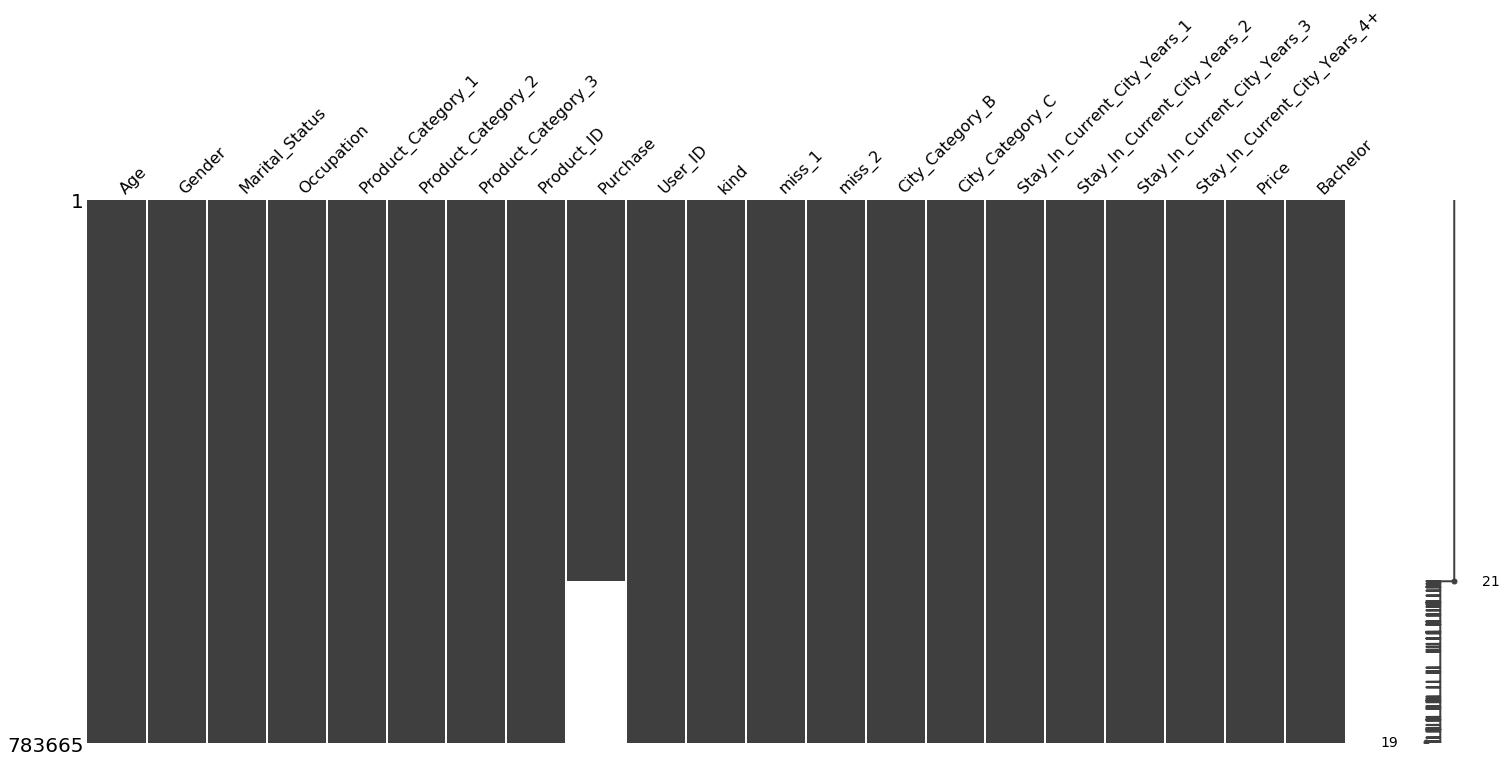

In [191]:
msno.matrix(combine);

As seen from the figure above the only misisng data is the purchase that will be predicted. the data is cleaned and ready to be modelled.
We seperate the data once more then we are ready to creat our model. 

<h3> Separate the data</h3>

In [192]:
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

train.drop(['kind'], axis=1, inplace=True)
test.drop(['kind','Purchase'], axis=1, inplace=True)

In [193]:
train.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,User_ID,miss_1,miss_2,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Price,Bachelor
0,0,1,0,10,3,6.0,14.0,P00069042,8370.0,1000001,0,0,0,0,0,1,0,0,2648.0,0
1,0,1,0,10,1,6.0,14.0,P00248942,15200.0,1000001,0,0,0,0,0,1,0,0,3880.0,0
2,0,1,0,10,12,14.0,17.0,P00087842,1422.0,1000001,0,0,0,0,0,1,0,0,343.0,0
3,0,1,0,10,12,14.0,17.0,P00085442,1057.0,1000001,0,0,0,0,0,1,0,0,365.0,0
4,6,0,0,16,8,2.0,17.0,P00285442,7969.0,1000002,0,0,0,1,0,0,0,1,3920.0,0


In [194]:
test.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,User_ID,miss_1,miss_2,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Price,Bachelor
0,4,0,1,7,1,11.0,12.0,P00128942,1000004,0,0,1,0,0,1,0,0,3933.0,0
1,2,0,0,17,3,5.0,12.0,P00113442,1000009,0,0,0,1,0,0,0,0,3077.0,0
2,3,1,1,1,5,14.0,12.0,P00288442,1000010,0,0,1,0,0,0,0,1,1734.0,0
3,3,1,1,1,4,9.0,12.0,P00145342,1000010,0,0,1,0,0,0,0,1,813.0,0
4,2,1,0,1,4,5.0,12.0,P00053842,1000011,0,0,0,1,1,0,0,0,684.0,1


<h2>4.MODELLING</h2>

In [195]:
#Dividing the data into test and train datasets
#drop purchase 
ID_col = ['Product_ID']
target = ['Purchase']
features = train.columns.drop(ID_col+target)


X = train[features].values
Y = train[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [196]:
#Further import necessary libries 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#from dask_searchcv import RandomizedSearchCV

<h3>Decision Trees</h3>

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values. 
Decision tree builds models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated 
decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches 
(e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. 
The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 
Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 
If the maximum depth of the tree is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

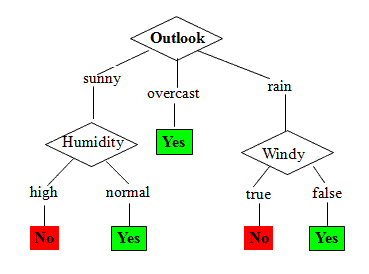

<h3>DRegresssion</h3>

Regression is to examine two things: (1) does a set of predictor variables do a good job of predicting an outcome (dependent) variable? (2) Which variables, 
in particular, are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the 
outcome variable? These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score,
c = constant, b = regression coefficient, and x = score on the independent variable.


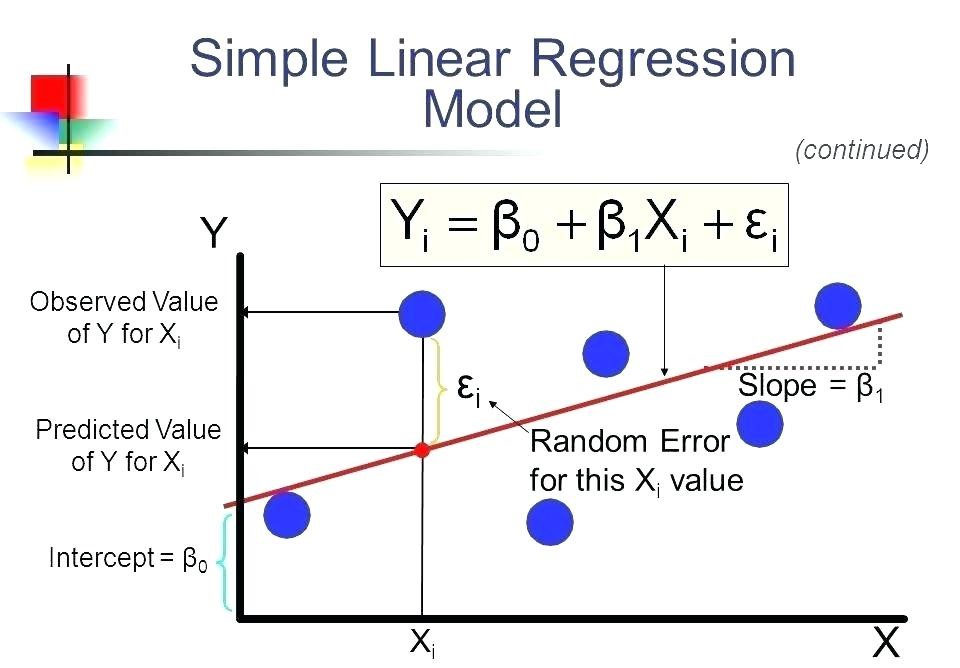

<h3>Ramdom forest</h3>

A random forest is an estimator that fits a number of classifying decision trees on various sub-samples of the dataset 
and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True. The idea behind this technique is to decorrelate the several trees. It generates on the different bootstrapped samples(i.e. self-generated samples) from training Data. And then we reduce the Variance in the Trees by averaging them. Hence, in this approach, it creates a large number of decision trees in python or R.The random forest model is very good at handling tabular data with numerical features, or categorical features with fewer than hundreds of categories. 
Random forests have the ability to capture the non-linear interaction between the features and the target.
Note:-Tree based models are not designed to work with very sparse features. When dealing with sparse input data, we can either pre-process the sparse features to generate numerical statistics or switch to a linear model, which is better suited for such scenarios.

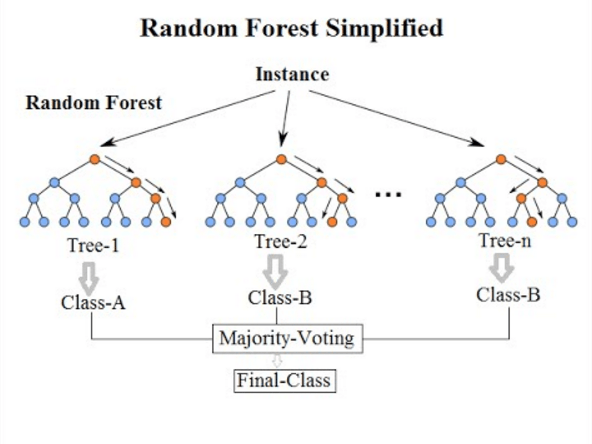

<h3>Gradient Boosting</h3>

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of 
weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing 
optimization of an arbitrary differentiable loss function. Boosting can be interpreted as an optimization algorithm on a suitable cost function. The latter two papers 
introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space 
by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the 
development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.gradient boosting combines weak "learners" 
into a single strong learner in an iterative fashion. It is easiest to explain in the least-squares regression setting, where the goal is to "teach" a model F to 
predict values of the form y ^ = F ( x ) by minimizing the mean squared error.


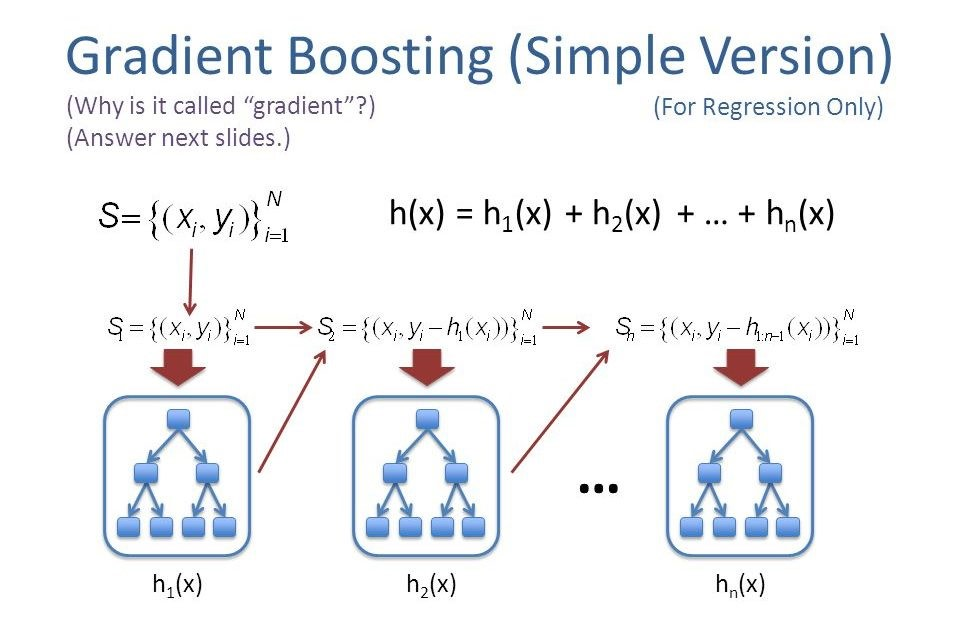

<h3> Assigning the variables </h3>
Next we will assign the functions to variables to be called later

In [197]:
lr    = LinearRegression()
dtr   = DecisionTreeRegressor()
rfr   = RandomForestRegressor()
gbr   = GradientBoostingRegressor()
xgb_r = xgb.XGBRegressor(learning_rate=1.0, max_depth=10, min_child_weight=40, seed=0)

<h3> train the model and do the fitting </h3>
Here we fit training data to Random Forest Regressor to the training data set. THe models below represent all the models used. 

In [210]:
fit1 = lr.fit(X_train,Y_train)    #Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,Y_train)   #Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,Y_train)   #Here we fit training data to Random forest Regressor
fit4 = gbr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
fit5 = xgb_r.fit(X_train, Y_train)#Here we fit training data to XGBoosting Regressor

[23:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<h2> Print the Accuracy score  </h2>

In [211]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,Y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,Y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,Y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,Y_test)*100)
print("Accuracy Score of XGBoost on testset",fit5.score(X_test,Y_test)*100)

Accuracy Score of Linear regression on test set 55.277750857593254
Accuracy Score of Decision Tree on test set 41.63749429370465
Accuracy Score of Random Forests on test set 67.07914419352052
Accuracy Score of Gradient Boosting on testset 65.573761973329
Accuracy Score of XGBoost on testset 70.38472203513723


<h2> RMSE Score for all models </h2>

In [212]:
#Linear Regression RMSE
PredLR = fit1.predict(X_test)
rmseLr = np.sqrt(mean_squared_error(PredLR,Y_test,))
rmseLr

3360.5484639533374

In [213]:
#Decision Tree
PredDt = fit2.predict(X_test)
rmseDt = np.sqrt(mean_squared_error(PredDt,Y_test,))
rmseDt

3838.975224163867

In [214]:
#Random Forests
PredRF = fit3.predict(X_test)
rmseRf = np.sqrt(mean_squared_error(PredRF,Y_test,))
rmseRf

2883.260636699995

In [215]:
#Gradient bosting
predBxt = fit4.predict(X_test)
rmseGb  = np.sqrt(mean_squared_error(predBxt,Y_test))
rmseGb

2948.4456604497777

In [216]:
#XG bosting
predXg = fit5.predict(X_test)
rmseXg   = np.sqrt(mean_squared_error(predXg,Y_test))
rmseXg

2734.678342394584

<H2>5.MODEL SELECTION AND PREDICTION</H2>
    We choose the XGBoosting Modelbecause it has the lowest RMSE. the next task is to optimise the model using it unique parameters. 

<H3>Try eXtreem Gradient Boosting</H3>
First the convertion of the data into data matrix.

In [217]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

Then the split the data set to get the training and the testing data in a ration of 80% to 20%
Create the XGBoost parameters in the function, focusing on the learning rate, maximum dept and min child weight, then colsample tree.

In [218]:
X_trainX, X_testX, y_trainX, y_testX = train_test_split(X, Y, test_size=0.3, random_state=0)

In [219]:
xg_reg = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [220]:
#train the model
FitXG = xg_reg.fit(X_trainX,y_trainX)

predXg = FitXG.predict(X_testX)

[23:32:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [221]:
#perform accuracy score for the predictions
print("Accuracy Score of XGBoost on testset",FitXG.score(X_testX,y_testX)*100)

Accuracy Score of XGBoost on testset 72.29065525365147


In [222]:
#Validate the model using the rootmeansquared method 
rmse = np.sqrt(mean_squared_error(y_testX, predXg))
print("RMSE: %f" % (rmse))

RMSE: 2647.406698


<h3>Apply the model on test </h3>
Next is to apply the model to our test data, to get our predictions. 

In [223]:
ID_col = ['Product_ID']
features = test.columns.drop(ID_col)
XT=test[features].values

In [224]:
predXgT = xg_reg.predict(XT)

In [225]:
predXgT=pd.DataFrame(predXgT, columns=['Purchase']) 

In [226]:
predXgT

,Purchase
0,16251.672852
1,10817.254883
2,6741.920898
3,3421.889893
4,1353.550049
...,...
233592,13311.694336
233593,5320.359375
233594,6949.834961
233595,5455.585938


In [227]:
TrainP = pd.concat([test,predXgT], axis=1)

In [228]:
TrainP.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,User_ID,miss_1,miss_2,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Price,Bachelor,Purchase
0,4,0,1,7,1,11.0,12.0,P00128942,1000004,0,0,1,0,0,1,0,0,3933.0,0,16251.672852
1,2,0,0,17,3,5.0,12.0,P00113442,1000009,0,0,0,1,0,0,0,0,3077.0,0,10817.254883
2,3,1,1,1,5,14.0,12.0,P00288442,1000010,0,0,1,0,0,0,0,1,1734.0,0,6741.920898
3,3,1,1,1,4,9.0,12.0,P00145342,1000010,0,0,1,0,0,0,0,1,813.0,0,3421.889893
4,2,1,0,1,4,5.0,12.0,P00053842,1000011,0,0,0,1,1,0,0,0,684.0,1,1353.550049


<h4>Select the required Column</h4>

In [229]:
Submission = TrainP[['Purchase','User_ID','Product_ID']]

In [230]:
Submission.head()

,Purchase,User_ID,Product_ID
0,16251.672852,1000004,P00128942
1,10817.254883,1000009,P00113442
2,6741.920898,1000010,P00288442
3,3421.889893,1000010,P00145342
4,1353.550049,1000011,P00053842


<h3>Copy the results to the submission file showing </h3>
Predicted Purchase, User_Id and Product_ID

In [231]:
Submission.to_csv('submission.csv', encoding='utf-8', index=False)

<H2>5. SUMMARY</H2>
About the Black Friday dataset, we can see some conclusions below:
<ol>
<li>Men go to Black Friday more than women</li>
<li>People who has 26-35 participate in Black Friday much more than others. </li>
<li>Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. </li>
 In summary we have three groups with the almost the same quantity of people between each element within the group.
<li>Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17;</li>
<li>We can't do much conclusions here, but is possible to realize that people with
    lows and highs occupation number go out to Black Friday more than who was mediums occupation number</li>
<li>People who lives in City B bought much more than others.</li>
</ol>

  
<H3>  Observation: </H3>
<ol>
<li>We can realize that, regardless the parameters, the graphs has almost the same shape</li>
<li>It's a very curious observation. Everyone has almost the same behavior according to money spend</li>
</ol>


